# Spoken Language Processing in Python

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Spoken Language Processing in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
# Chapter 1 - Introduction to Spoken Language Processing with Python
import wave
from playsound import playsound

# CHAPTER 2 - Using the Python SpeechRecognition library
import speech_recognition as sr

# CHAPTER 3 - Manipulating Audio Files with PyDub
from pydub import AudioSegment
from pydub.playback import play
from pydub.effects import normalize

# CHAPTER 4 - Processing text transcribed from spoken language
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
from spacy.pipeline import EntityRuler

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
%%time
from pdf2image import convert_from_path

poppler_path = 'C:/Users/Admin/poppler-0.68.0/bin'

# pdf with the course material
pdf_1 = convert_from_path(data_folder +"chapter1.pdf", 50, poppler_path=poppler_path)
pdf_2 = convert_from_path(data_folder +"chapter2.pdf", 50, poppler_path=poppler_path)
pdf_3 = convert_from_path(data_folder +"chapter3.pdf", 50, poppler_path=poppler_path)
pdf_4 = convert_from_path(data_folder +"chapter4.pdf", 50, poppler_path=poppler_path)

Wall time: 5.25 s


In [5]:
# plot 1 image
def plot_pdf_1(pdf, page, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0):
    plt.axis('off'); plt.imshow(pdf[page])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_pdf_2(pdf, page1, page2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1); plt.axis('off'); plt.imshow(pdf[page1])
    plt.subplot(1, 2, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_pdf_3(pdf, page1, page2, page3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1); plt.axis('off'); plt.imshow(pdf[page1]); 
    plt.subplot(1, 3, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplot(1, 3, 3); plt.axis('off'); plt.imshow(pdf[page3])
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_pdf_4(pdf, page1,page2,page3,page4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1); plt.axis('off'); plt.imshow(pdf[page1])
    plt.subplot(1, 4, 2); plt.axis('off'); plt.imshow(pdf[page2])
    plt.subplot(1, 4, 3); plt.axis('off'); plt.imshow(pdf[page3])
    plt.subplot(1, 4, 4); plt.axis('off'); plt.imshow(pdf[page4])    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

In [6]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1); image = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplot(1, 2, 2); image = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1); imagem = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(imagem); 
    plt.subplot(1, 3, 2); imagem = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 3, 3); imagem = plt.imread(data_folder + (image3+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1); imagem = plt.imread(data_folder + (image1+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 2); imagem = plt.imread(data_folder + (image2+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 3); imagem = plt.imread(data_folder + (image3+format_img)); plt.axis('off'); plt.imshow(imagem)
    plt.subplot(1, 4, 4); imagem = plt.imread(data_folder + (image4+format_img)); plt.axis('off'); plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Introduction to Spoken Language Processing with Python

Audio files are different from most other types of data. Before you can start working with them, they require some preprocessing. In this chapter, you'll learn the first steps to working with speech files by converting two different audio files into soundwaves and comparing them visually.

#### Exercício 1 - Introduction to audio data in Python

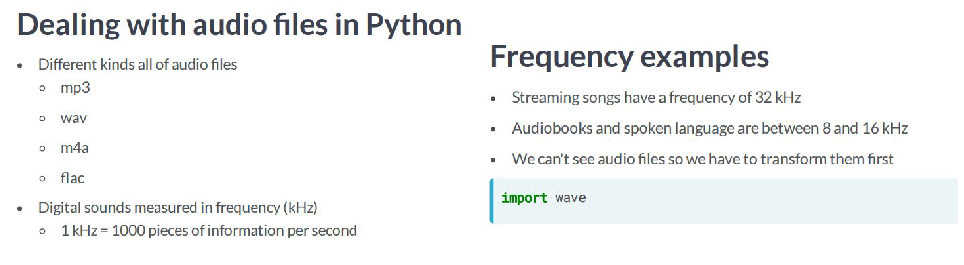

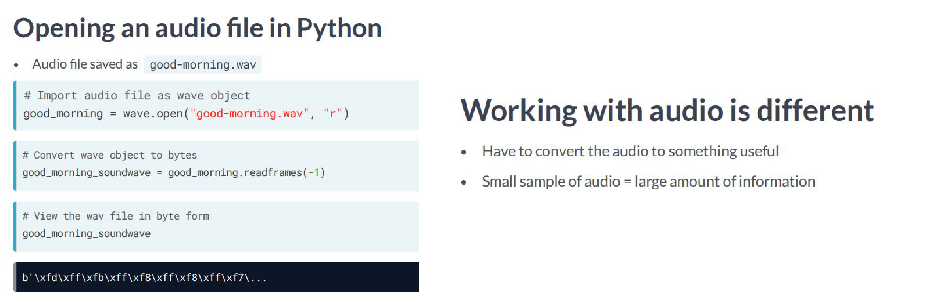

In [7]:
#vídeo

plot_2('audio0', 'audio1'); plot_2('audio2', 'audio3')

import wave

Exercício 2

In [8]:
# The right frequency

# Movies play multiple pictures per second succession to give the illusion of moving pictures, sound is similar but usually
# at a much larger rate. What's the standard unit of measure for sound frequency?

print("Hz (Hertz). Our audio files have been 48 kHz so far: that's 48 000 cycles per second.")

Hz (Hertz). Our audio files have been 48 kHz so far: that's 48 000 cycles per second.


Exercício 3

In [9]:
# Importing an audio file with Python ()

import wave

# Create audio file wave object
good_morning = wave.open(data_folder + 'nice-work.wav', 'r')
print(good_morning)

# Read all frames from wave object 
signal_gm = good_morning.readframes(-1)

print("Lenght of the audio file: {}".format(len(signal_gm)))

# View first 10
signal_gm[:10]

Lenght of the audio file: 123604


b'\xdd\xff\xdd\xff\x94\xff\x94\xff\x87\xff'

#### Exercício 4 - Converting sound wave bytes to integers

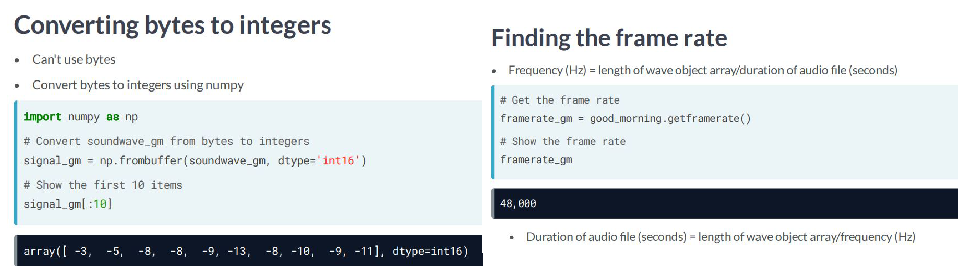

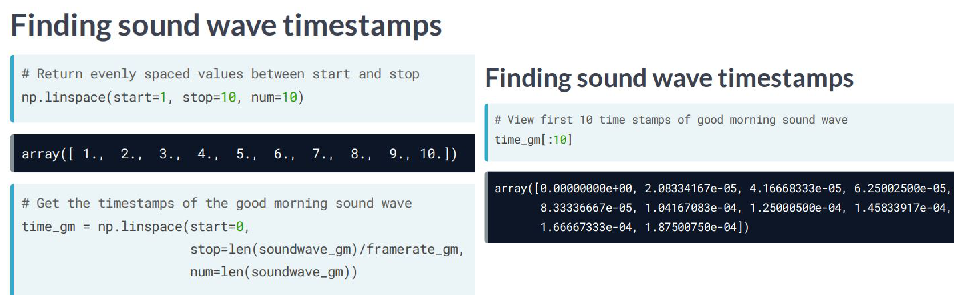

In [10]:
#vídeo
plot_2('8', '9'); plot_2('10', '11')

Exercício 5

In [11]:
# The right data type

# dtype defaults to float in np.frombuffer(), what's the correct dtype to set it to for visualizing sound wave bytes?
print("int16 - The 'int16' data type returns positive and negative integers, as we want.")
np.frombuffer(signal_gm, dtype="int16")

int16 - The 'int16' data type returns positive and negative integers, as we want.


array([ -35,  -35, -108, ...,    0,    0,    0], dtype=int16)

Exercício 6

In [12]:
# Bytes to integers

# Convert good morning audio bytes to integers
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# View the first 10 sound wave values
print(soundwave_gm[:10])

# We read in an audio file with Python and converted into to integers, that's the first step towards speech recognition

[ -35  -35 -108 -108 -121 -121  -47  -47 -127 -127]


Exercício 7

In [13]:
# Finding the time stamps

# Read in sound wave and convert from bytes to integers
good_morning = wave.open(data_folder +'nice-work.wav', 'r')
signal_gm = good_morning.readframes(-1)
soundwave_gm = np.frombuffer(signal_gm, dtype='int16')

# Get the sound wave frame rate
framerate_gm = good_morning.getframerate()

# Find the sound wave timestamps
time_gm = np.linspace(start=0, stop=len(soundwave_gm)/framerate_gm, num=len(soundwave_gm))

# Print the first 10 timestamps
print(time_gm[:10])


[0.00000000e+00 2.26761039e-05 4.53522078e-05 6.80283116e-05
 9.07044155e-05 1.13380519e-04 1.36056623e-04 1.58732727e-04
 1.81408831e-04 2.04084935e-04]


#### Exercício 8 - Visualizing sound waves

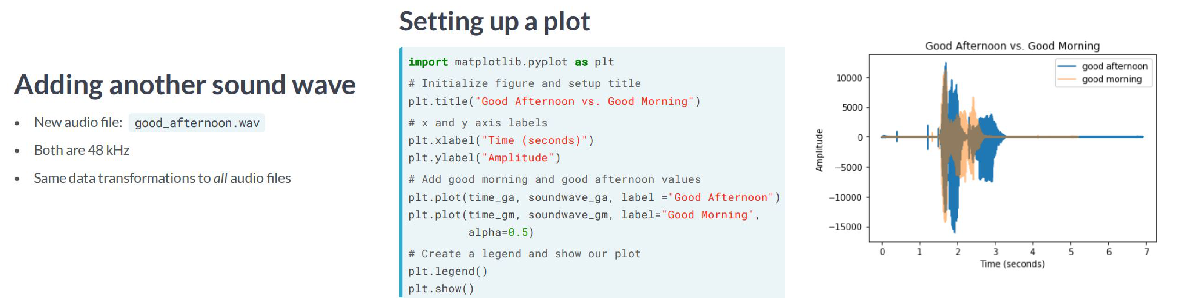

In [14]:
#vídeo
plot_3('12', '13', '14')

Exercício 9

In [15]:
# Staying consistent

# Why is it important to ensure the same data transformations are performed on all of your audio files?
print("To ensure data consistency and prevent potential data mismatches.")

To ensure data consistency and prevent potential data mismatches.


Exercício 10

In [16]:
# Processing audio data with Python

# Read in sound wave and convert from bytes to integers
oh_my_god_1 = wave.open(data_folder +'oh-my-god-1.wav', 'r')
signal_1 = oh_my_god_1.readframes(-1)
soundwave_1 = np.frombuffer(signal_1, dtype='int16')

# Get the sound wave frame rate
framerate_1 = oh_my_god_1.getframerate()

# Find the sound wave timestamps
time_1 = np.linspace(start=0, stop=len(soundwave_1)/framerate_1, num=len(soundwave_1))

# Oh my God 2

# Read in sound wave and convert from bytes to integers
oh_my_god_2 = wave.open(data_folder +'oh-my-god-2.wav', 'r')
signal_2 = oh_my_god_2.readframes(-1)
soundwave_2 = np.frombuffer(signal_2, dtype='int16')

# Get the sound wave frame rate
framerate_2 = oh_my_god_2.getframerate()

# Find the sound wave timestamps
time_2 = np.linspace(start=0, stop=len(soundwave_2)/framerate_2, num=len(soundwave_2))

#######################################################################################################

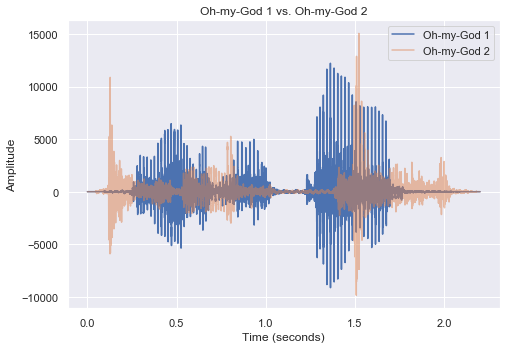

In [17]:
# Setup the title and axis titles
plt.title('Oh-my-God 1 vs. Oh-my-God 2')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_1, soundwave_1, label='Oh-my-God 1')

# Add the Good Morning data to the plot
plt.plot(time_2, soundwave_2, label='Oh-my-God 2', alpha=0.5)
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [18]:
from playsound import playsound
playsound(data_folder + 'oh-my-god-1.wav')
playsound(data_folder + 'oh-my-god-2.wav')

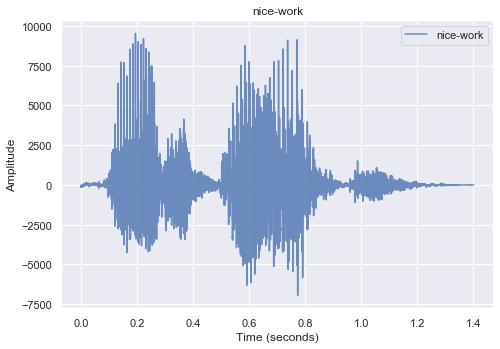

In [19]:
# Setup the title and axis titles
plt.title('nice-work')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the Good Afternoon data to the plot
plt.plot(time_gm, soundwave_gm, label='nice-work', alpha=0.8)
plt.legend()

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

from playsound import playsound
playsound(data_folder + 'nice-work.wav')

# CHAPTER 2 - Using the Python SpeechRecognition library


Speech recognition is still far from perfect. But the SpeechRecognition library provides an easy way to interact with many speech-to-text APIs. In this section, you'll learn how to use the SpeechRecognition library to easily start converting the spoken language in your audio files to text.

#### Exercício 1 - SpeechRecognition Python library

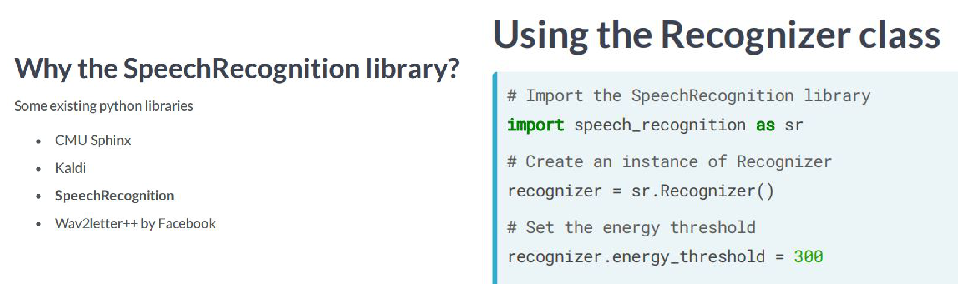

The energy_threshold could be thought as the loudness of audio above which is considered speech. 
Values above the threshold are considered speech. Values below are considered silent. 
A silent room is typically between 0 and 100. speech_recognition documentation recommends 300 as a starting value.


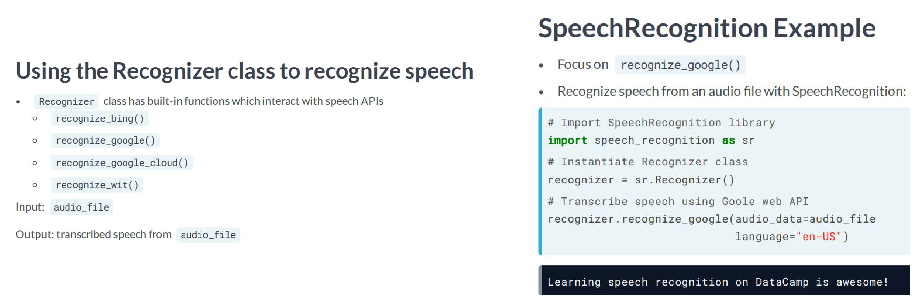

We'll use recognize_google because it is free. However, this limits us to 50 requests per day or if the audio 
file is too long (>5 minutes).


In [20]:
#vídeo

import speech_recognition as sr

plot_2('sr0', 'sr2')
print("""The energy_threshold could be thought as the loudness of audio above which is considered speech. 
Values above the threshold are considered speech. Values below are considered silent. 
A silent room is typically between 0 and 100. speech_recognition documentation recommends 300 as a starting value.""")

plot_2('sr3', 'sr4')
print("""We'll use recognize_google because it is free. However, this limits us to 50 requests per day or if the audio 
file is too long (>5 minutes).""")

Exercício 2

In [21]:
# Pick the wrong speech_recognition API

# Which of the following is not a speech recognition API within the speech_recognition library?
print("what_does_this_say()")

what_does_this_say()


Exercício 3

In [22]:
# Using the SpeechRecognition library

# Importing the speech_recognition library
import speech_recognition as sr

# Create an instance of the Recognizer class
recognizer = sr.Recognizer()

# Set the energy threshold
recognizer.energy_threshold = 300


Exercício 4

In [23]:
# Using the Recognizer class

# Audio data
audio_file = sr.AudioFile(data_folder + "nice-work.wav")
with audio_file as source:
    audio = recognizer.record(source)

##################################################################################################
    
# Transcribe the support call audio
text = recognizer.recognize_google(audio_data=audio, language="en-US")

print(text)   # As powerful as recognize_google() is, it doesn't have sentence separation.

nice work


#### Exercício 5 - Reading audio files with SpeechRecognition

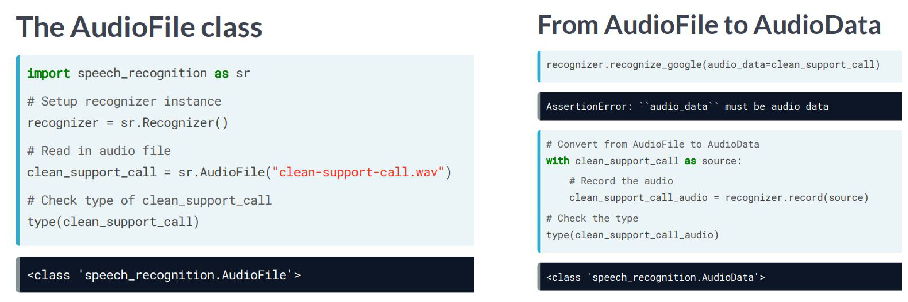

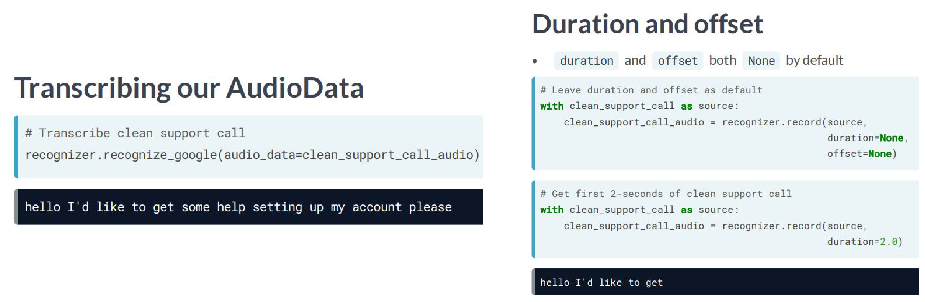

In [24]:
#vídeo
plot_2('af1', 'af2'); plot_2('af3', 'af4')

Exercício 6

In [25]:
# From AudioFile to AudioData

# Instantiate Recognizer
recognizer = sr.Recognizer()

# Convert audio to AudioFile
a = sr.AudioFile(data_folder + 'oh-my-god-1.wav')

# Convert AudioFile to AudioData
with a as source:
    clean_a = recognizer.record(source)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_a, language="en-US")
print(text)


oh my God


Exercício 7

In [26]:
# Recording the audio we need

# Sometimes you may not want the entire audio file you're working with. The duration and offset parameters of the record()
# method can help with this (both measured in seconds).

# Instantiate Recognizer
recognizer = sr.Recognizer()

# you-call-that-fun (4 seconds)
fun = sr.AudioFile(data_folder + 'you-call-that-fun.wav')

# Convert AudioFile to AudioData
with fun as source:
    clean_fun = recognizer.record(source, duration=2, offset=None)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_fun, language="en-US")
print(text)

######################################################################

# Convert AudioFile to AudioData
with fun as source:
    clean_fun = recognizer.record(source, offset=1)

# Transcribe AudioData to text
text = recognizer.recognize_google(clean_fun, language="en-US")
print(text)


you call that
you call that fun that was boring


#### Exercício 8 - Dealing with different kinds of audio

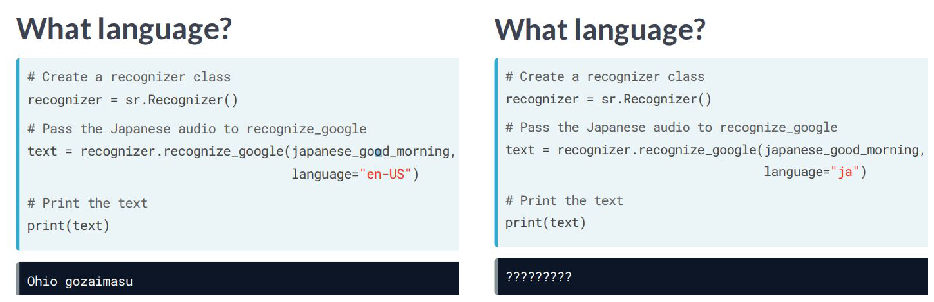

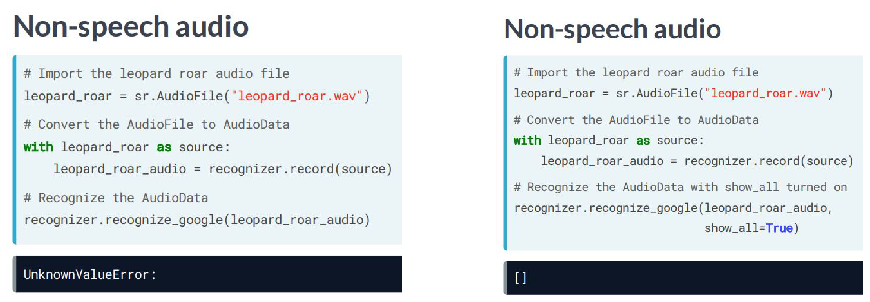

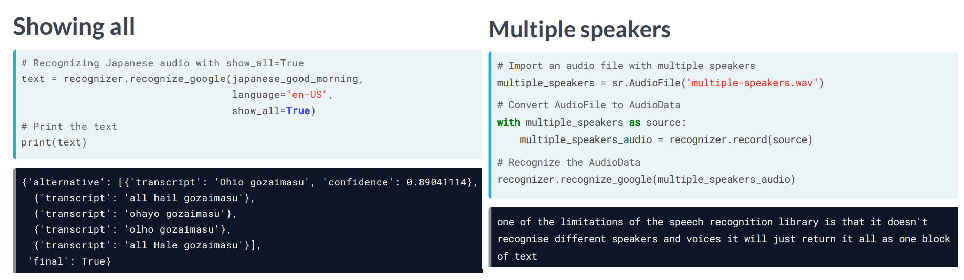

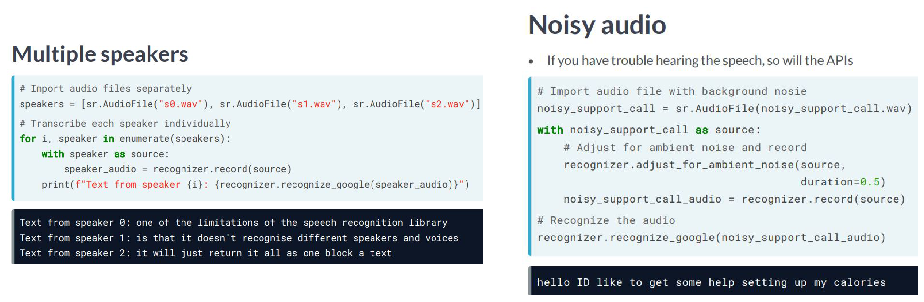

In [27]:
#vídeo

# plot_pdf_2(pdf_2, 15, 16); plot_pdf_2(pdf_2, 17, 18); plot_pdf_2(pdf_2, 19, 20); 

plot_2('a1', 'a2'); plot_2('a3', 'a4'); plot_2('a5', 'a6'); plot_2('a7', 'a8');


Exercício 9

In [28]:
# Different kinds of audio

# Convert audio to AudioFile
audio = sr.AudioFile(data_folder + 'good-morning-japanese.wav')
with audio as source:
    japanese_audio = recognizer.record(source)


# Create a recognizer class
recognizer = sr.Recognizer()

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="en-US")
print(text)

# Pass the Japanese audio to recognize_google
text = recognizer.recognize_google(japanese_audio, language="ja")
print(text)

ohayo gozaimasu
おはようございます


In [29]:
# Convert audio to AudioFile
audio = sr.AudioFile(data_folder + 'leopard.wav')
with audio as source:
    leopard_audio = recognizer.record(source)
    
# Pass the leopard roar audio to recognize_google
text = recognizer.recognize_google(leopard_audio, language="en-US", show_all=True)
print(text)

[]


In [30]:
# Convert audio to AudioFile
audio = sr.AudioFile(data_folder + 'charlie-bit-me-5.wav')
with audio as source:
    charlie_audio = recognizer.record(source)
    
# Pass the leopard roar audio to recognize_google
text = recognizer.recognize_google(charlie_audio, language="en-US")
print(text)

#  it didn't return the baby saying 'ahhh!' because it doesn't recognize it as a word. 

charlie bit me


Exercício 10

In [31]:
# Multiple Speakers 1

# Convert audio to AudioFile
audio = sr.AudioFile(data_folder + 'multiple-speakers-16k.wav')
with audio as source:
    multiple_speakers = recognizer.record(source)
    
# Pass the leopard roar audio to recognize_google
text = recognizer.recognize_google(multiple_speakers, language="en-US")
print(text)

is that it doesn't recognize different speakers invoices it will just return it all as one block of text


Exercício 11

In [32]:
%%script false
# Multiple Speakers 2
recognizer = sr.Recognizer()

# Multiple speakers on different files
speakers = [sr.AudioFile("speaker_0.wav"), sr.AudioFile("speaker_1.wav"), sr.AudioFile("speaker_2.wav")]

# Transcribe each speaker individually
for i, speaker in enumerate(speakers):
    with speaker as source:
        speaker_audio = recognizer.record(source)
    print(f"Text from speaker {i}:")
    print(recognizer.recognize_google(speaker_audio, language="en-US"))


Couldn't find program: 'false'


Exercício 12

In [33]:
# Working with noisy audio

recognizer = sr.Recognizer()

clean_support_call = sr.AudioFile(data_folder + 'clean-support-call.wav')
noisy_support_call = sr.AudioFile(data_folder + '2-noisy-support-call.wav')

# Record the audio from the clean support call
with clean_support_call as source:
    clean_support_call_audio = recognizer.record(source)
    
# Record the audio from the noisy support call
with noisy_support_call as source:
    noisy_support_call_audio = recognizer.record(source)


# Transcribe the speech from the clean support call
text = recognizer.recognize_google(clean_support_call_audio, language="en-US")
print(text)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)
print("\n", text)


hello I'd like to get some help setting up my account please

 {'alternative': [{'transcript': "hello I'd like to get to help setting up my account", 'confidence': 0.92781943}, {'transcript': "hello I'd like to get some help setting up my account"}, {'transcript': "hello I'd like to get to help thinning out my account"}, {'transcript': "hello I'd like to get to help setting up my account."}, {'transcript': "hello I'd like to get to help setting up my calendar"}], 'final': True}


In [34]:
# Set the duration parameter of adjust_for_ambient_noise() to 1 (second) so recognizer adjusts for background noise.

# Record the audio from the noisy support call
with noisy_support_call as source:
    # Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=1)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)
print(text)

{'alternative': [{'transcript': "I'd like to get to help setting up my account", 'confidence': 0.8961466}, {'transcript': "I'd like to get to help setting up my calendar"}, {'transcript': "I'd like to get to help setting up my account."}, {'transcript': "I'd like to get to help thinning out my account"}, {'transcript': "I'd like to get some help setting up my account"}], 'final': True}


In [35]:
# Set the duration parameter of adjust_for_ambient_noise() to 0.5 (second) so recognizer adjusts for background noise.

# Record the audio from the noisy support call
with noisy_support_call as source:
    # Adjust the recognizer energy threshold for ambient noise
    recognizer.adjust_for_ambient_noise(source, duration=0.5)
    noisy_support_call_audio = recognizer.record(noisy_support_call)

# Transcribe the speech from the noisy support call
text = recognizer.recognize_google(noisy_support_call_audio, language="en-US", show_all=True)
print(text)

{'alternative': [{'transcript': "hello I'd like to get to help setting up my account", 'confidence': 0.93417448}, {'transcript': "hello I'd like to get to help setting up my calendar"}, {'transcript': "hello I'd like to get to help setting up my account."}, {'transcript': "hello I'd like to get to help setting up my calculator"}, {'transcript': "hello I'd like to get to help setting up my Kelly"}], 'final': True}


In [36]:
# Well, the results still weren't perfect. This should be expected with some audio files though, sometimes the background 
# noise is too much. If your audio files have a large amount of background noise, you may need to preprocess them with an
# audio tool such as Audacity before using them with speech_recognition.

# CHAPTER 3 - Manipulating Audio Files with PyDub


Not all audio files come in the same shape, size or format. Luckily, the PyDub library by James Robert provides tools which you can use to programmatically alter and change different audio file attributes such as frame rate, number of channels, file format and more. In this chapter, you'll learn how to use this helpful library to ensure all of your audio files are in the right shape for transcription.

#### Exercício 1 - Introduction to PyDub

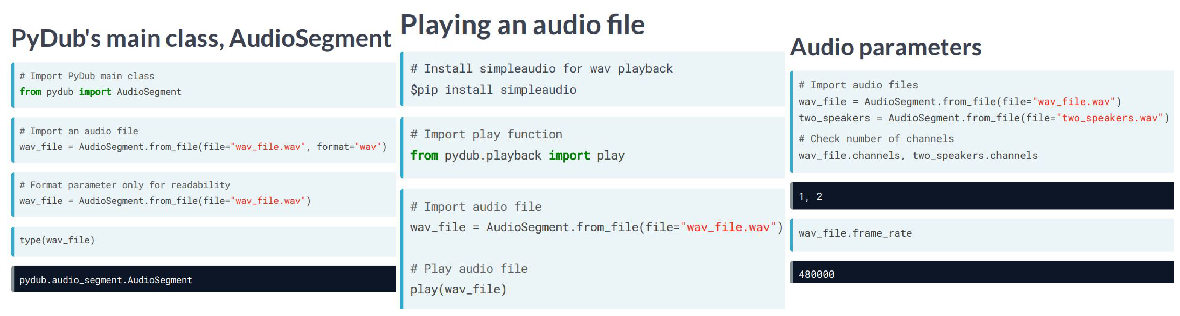

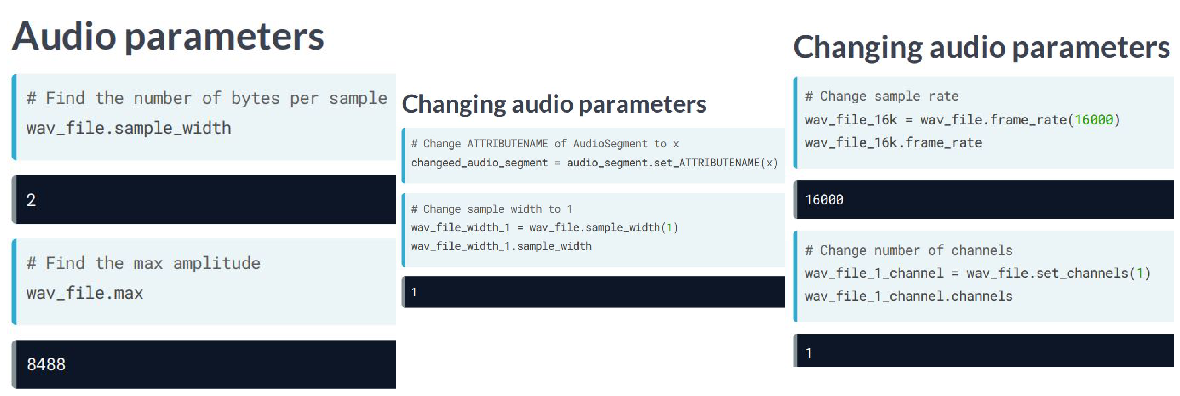

In [37]:
#vídeo

plot_3('p1', 'p2', 'p3'); plot_3('audio4', 'audio5', 'audio6')

from pydub.playback import play
wav_file = AudioSegment.from_file(file=data_folder + "oh-my-god-1.wav")

Exercício 2

In [38]:
# Import an audio file with PyDub

# Import AudioSegment from Pydub
from pydub import AudioSegment

# Create an AudioSegment instance
wav_file = AudioSegment.from_file(file=data_folder+'wav_file.wav', format="wav")

# Check the type
print(type(wav_file))

<class 'pydub.audio_segment.AudioSegment'>


Exercício 3

In [39]:
# Play an audio file with PyDub

# Import play
from pydub.playback import play

# Play the audio file
play(wav_file)


Exercício 4

In [40]:
# Audio parameters with PyDub

# Find the frame rate
print(wav_file.frame_rate)

# Find the number of channels
print(wav_file.channels)

# Find the max amplitude
print(wav_file.max)

# Find the length (in milliseconds)
print(len(wav_file))

#######################

# Print sample_width
print(f"Old sample width: {wav_file.sample_width}")

# Set sample_width to 1
wav_file_sw_1 = wav_file.set_sample_width(1)

# Check new sample_width
print(f"New sample width: {wav_file_sw_1.sample_width}")

48000
2
8484
3284
Old sample width: 2
New sample width: 1


Exercício 5

In [41]:
# Adjusting audio parameters

# Import audio file
wav_file = AudioSegment.from_file(file=data_folder+"wav_file.wav")

# Create a new wav file with adjusted frame rate
wav_file_16k = wav_file.set_frame_rate(16000)
print(wav_file_16k.frame_rate)

# Set number of channels to 1
wav_file_1_ch = wav_file.set_channels(1)
print(wav_file_1_ch.channels)


16000
1


#### Exercício 6 - Manipulating audio files with PyDub

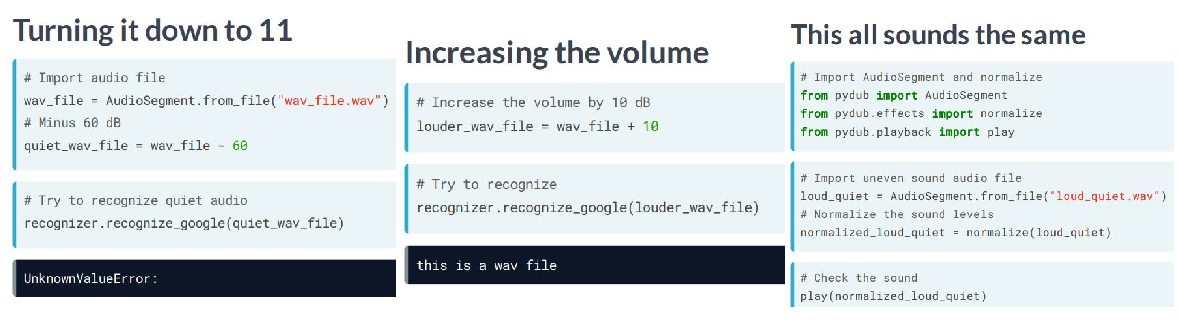

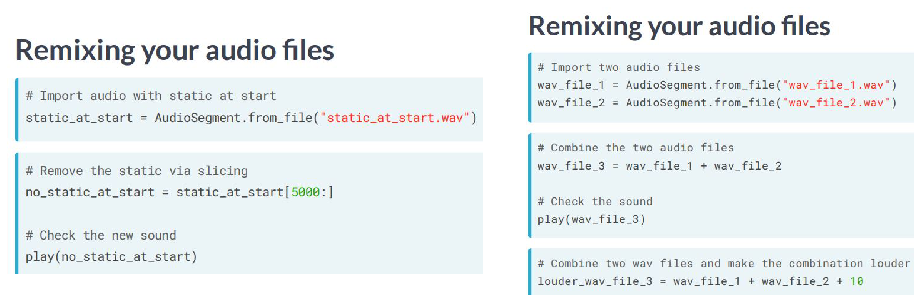

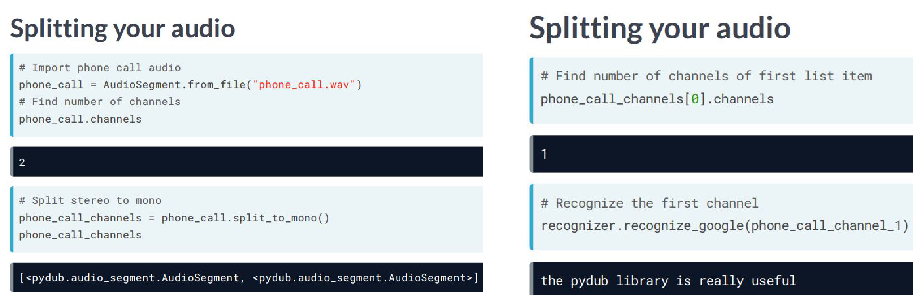

In [42]:
#vídeo
plot_3('m1', 'm2', 'm3'); print("="*120); plot_2('m4', 'm5'); plot_2('m6', 'm7')

Exercício 7

In [43]:
# Turning it down... then up

from pydub import AudioSegment

# Import audio file
volume_adjusted = AudioSegment.from_file(data_folder + 'volume_adjusted.wav')

# Lower the volume by 60 dB
quiet_volume_adjusted = volume_adjusted - 60

# Increase the volume by 15 dB
louder_volume_adjusted = volume_adjusted + 15

# play(volume_adjusted)

Exercício 8

In [44]:
# Normalizing an audio file with PyDub

# Import AudioSegment and normalize
from pydub import AudioSegment
from pydub.effects import normalize

# Import target audio file
# loud_then_quiet = AudioSegment.from_file('loud_then_quiet.wav')

# Normalize target audio file
normalized_loud_then_quiet = normalize(louder_volume_adjusted)

# play(normalized_loud_then_quiet)

Exercício 9

In [45]:
# Chopping and changing audio files

from pydub import AudioSegment

# Import part 1 and part 2 audio files
part_1 = AudioSegment.from_file(data_folder + 'part_1.wav')
part_2 = AudioSegment.from_file(data_folder + 'part_2.wav')

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2


Exercício 10

In [46]:
# Splitting stereo audio to mono with PyDub

# Import AudioSegment
from pydub import AudioSegment

# Import stereo audio file and check channels
stereo_phone_call = AudioSegment.from_file(data_folder + 'stereo_phone_call.wav')
print(f"Stereo number channels: {stereo_phone_call.channels}")

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]


Stereo number channels: 2
Split number channels: 1, 1


#### Exercício 11 - Converting and saving audio files with PyDub

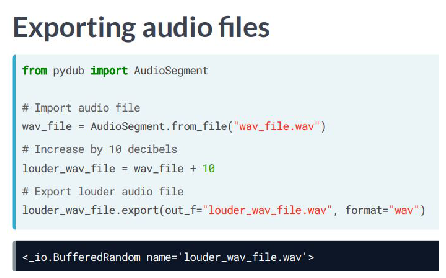

default export is in mp3, so here we need to define format='wav'


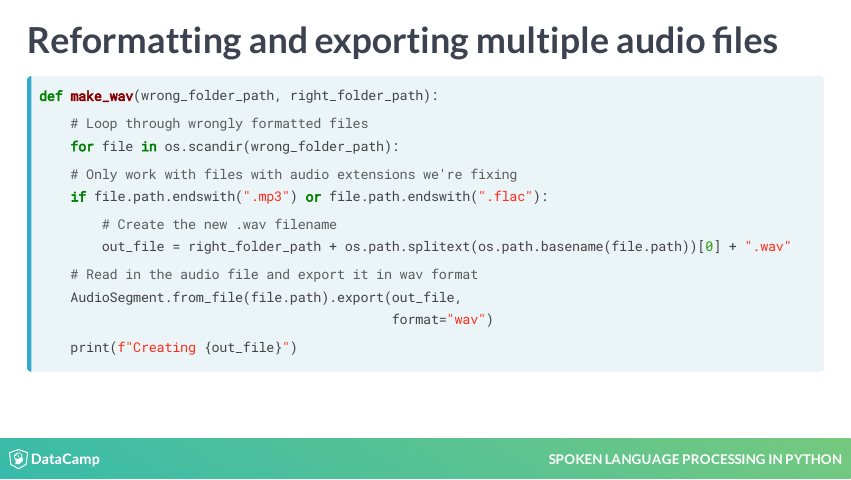

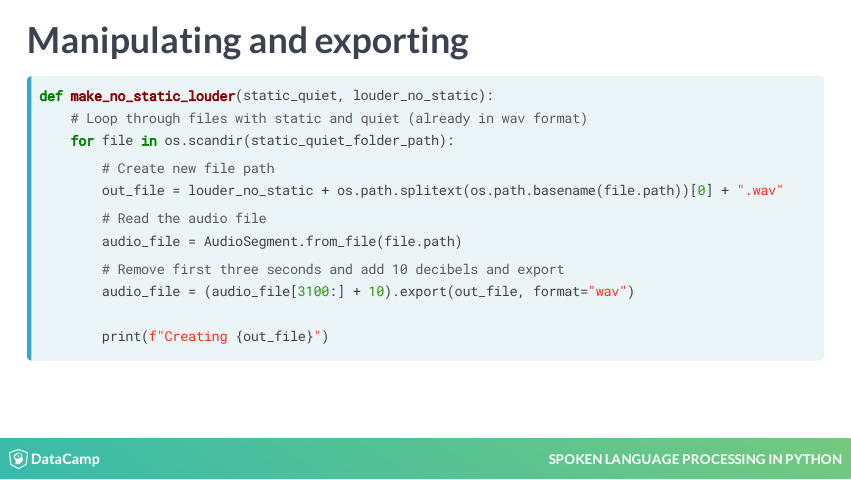

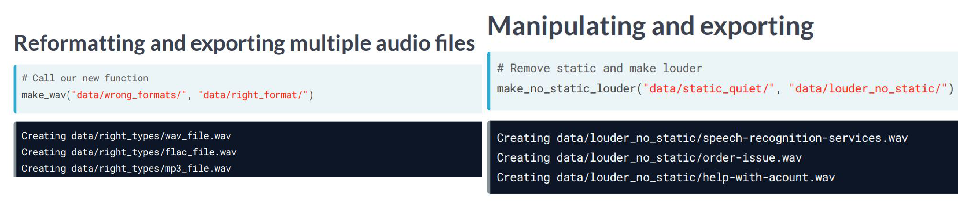

In [47]:
#vídeo
plot_1('e1'); print("default export is in mp3, so here we need to define format='wav'")
display(pdf_3[21]); display(pdf_3[23]); plot_2('e3', 'e4');

Exercício 12

In [48]:
%%script false
# Exporting and reformatting audio files

from pydub import AudioSegment

# Import the .mp3 file
mp3_file = AudioSegment.from_file(data_folder + 'mp3_file.mp3')

# Export the .mp3 file as wav
mp3_file.export(out_f=data_folder+"mp3_file.wav", format="wav")


Couldn't find program: 'false'


Exercício 13

In [49]:
%%script false
# Manipulating multiple audio files with PyDub

# Loop through the files in the folder
for audio_file in folder:
    
    # Create the new .wav filename
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
        
    # Read audio_file and export it in wav format
    AudioSegment.from_file(audio_file).export(out_f=wav_filename, format="wav")
        
    print(f"Creating {wav_filename}...")

Couldn't find program: 'false'


Exercício 14

In [50]:
%%script false
# An audio processing workflow

file_with_static = AudioSegment.from_file("account_help.mp3")

# Cut the 3-seconds of static off
file_without_static = file_with_static[3000:]

# Increase the volume by 10dB
louder_file_without_static = file_without_static + 10

#############

for audio_file in folder:
    file_with_static = AudioSegment.from_file(audio_file)

    # Cut the 3-seconds of static off
    file_without_static = file_with_static[3000:]

    # Increase the volume by 10dB
    louder_file_without_static = file_without_static + 10
    
    # Create the .wav filename for export
    wav_filename = os.path.splitext(os.path.basename(audio_file))[0] + ".wav"
    
    # Export the louder file without static as .wav
    louder_file_without_static.export(wav_filename, format="wav")
    print(f"Creating {wav_filename}...")


Couldn't find program: 'false'


# CHAPTER 4 - Processing text transcribed from spoken language


In this chapter, you'll put everything you've learned together by building a speech processing proof of concept project for a technology company, Acme Studios. You'll start by transcribing customer support call phone call audio snippets to text. Then you'll perform sentiment analysis using NLTK, named entity recognition using spaCy and text classification using scikit-learn on the transcribed text.

#### Exercício 1 - Creating transcription helper functions

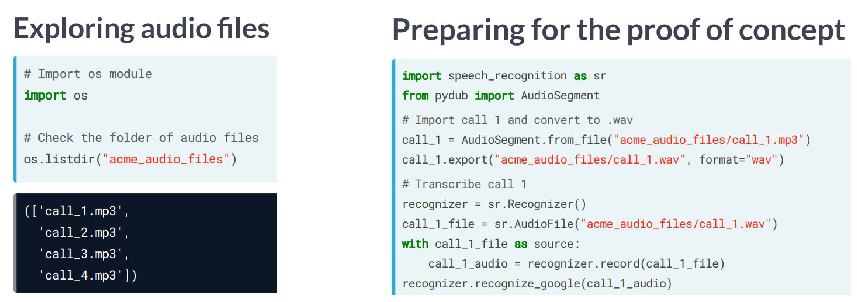

Functions we'll create: 
- convert_to_wav() converts non- .wav files to .wav files.
- show_pydub_stats() shows the audio attributes of a .wav file.
- transcribe_audio() uses recognize_google() to transcribe a .wav file.


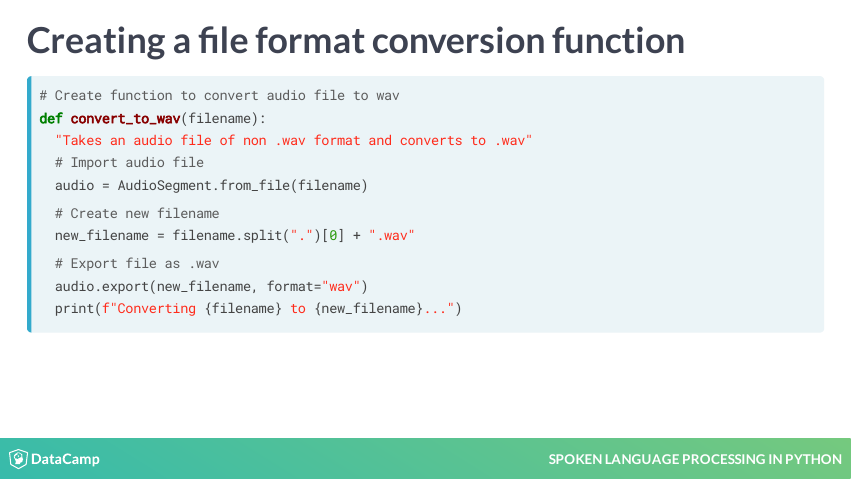

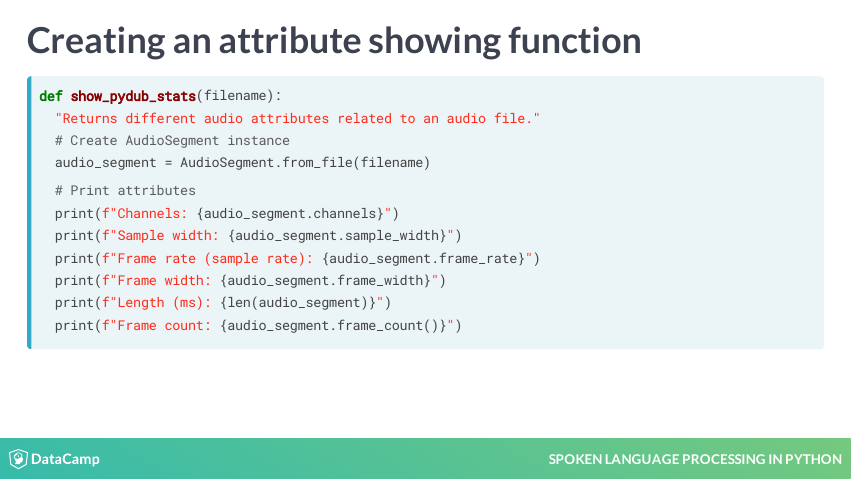

In [51]:
#vídeo

plot_2('q1', 'q2'); 

print("""Functions we'll create: 
- convert_to_wav() converts non- .wav files to .wav files.
- show_pydub_stats() shows the audio attributes of a .wav file.
- transcribe_audio() uses recognize_google() to transcribe a .wav file.""")

display(pdf_4[4]); display(pdf_4[6]);

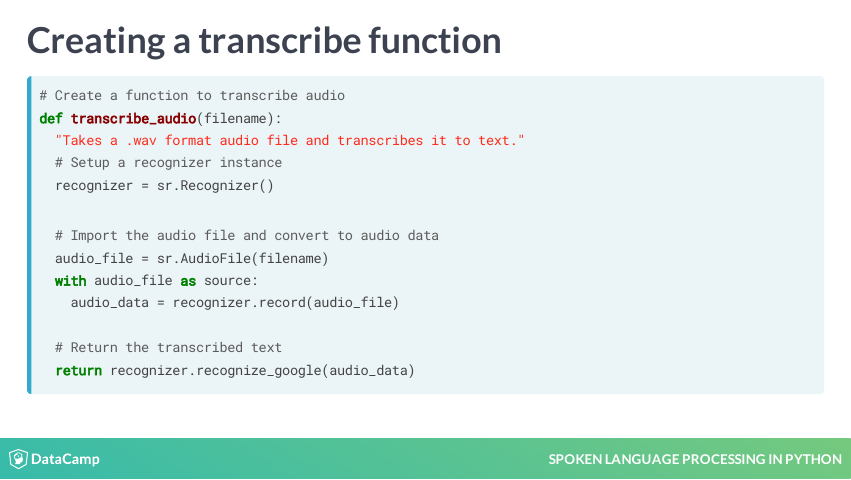

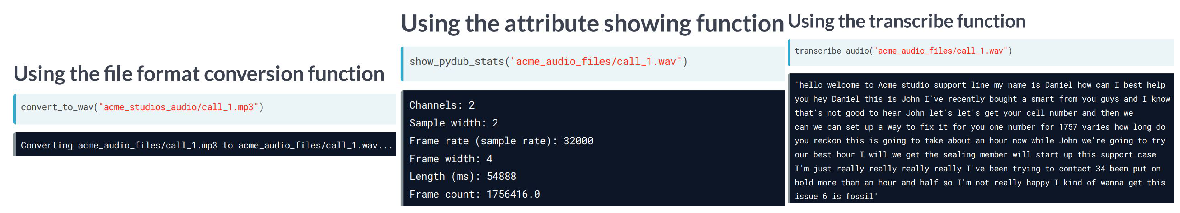

In [52]:
 display(pdf_4[8]); plot_3('q4', 'q5', 'q6')

Exercício 2

In [53]:
# Converting audio to the right format

# Create function to convert audio file to wav
def convert_to_wav(filename):
    """Takes an audio file of non .wav format and converts to .wav"""
    # Import audio file
    audio = AudioSegment.from_file(filename)
    
    # Create new filename
    new_filename = filename.split(".")[0] + ".wav"
  
    # Export file as .wav
    audio.export(new_filename, format="wav")
    print(f"Converting {filename} to {new_filename}...")

# Test the function
# convert_to_wav(data_folder + 'mp3_file.mp3')

Exercício 3

In [54]:
# Finding PyDub stats

def show_pydub_stats(filename):
    """Returns different audio attributes related to an audio file."""
    # Create AudioSegment instance
    audio_segment = AudioSegment.from_file(filename)
  
    # Print audio attributes and return AudioSegment instance
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    return audio_segment

# Try the function
call_1_audio_segment = show_pydub_stats(data_folder + "nice-work.wav")


Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 701


Exercício 4

In [55]:
# Transcribing audio with one line

def transcribe_audio(filename):
    """Takes a .wav format audio file and transcribes it to text."""
    # Setup a recognizer instance
    recognizer = sr.Recognizer()
  
    # Import the audio file and convert to audio data
    audio_file = sr.AudioFile(filename)
    with audio_file as source:
        audio_data = recognizer.record(source)
  
    # Return the transcribed text
    return recognizer.recognize_google(audio_data)

# Test the function
print(transcribe_audio(data_folder + "call_1_stereo_formatted.wav"))


hello welcome to Acme Studio support lawn my name is Daniel how can I best help you this is John


In [56]:
# You'll notice the recognizer didn't transcribe the words 'fast as' adequately on the last line, starring them out as a
# potential expletive, this is a reminder speech recognition still isn't perfect.

Exercício 5

In [57]:
# Using the helper functions you've built

# Convert mp3 file to wav
# convert_to_wav("call_1.mp3")

# Check the stats of new file
call_1 = show_pydub_stats(data_folder + "call_1_stereo_formatted.wav")

# Split call_1 to mono
call_1_split = call_1.split_to_mono()

# Export channel 2 (the customer channel)
call_1_split[1].export(data_folder + "call_1_channel_2.wav", format="wav")

# Transcribe the single channel
print("\n")
print(transcribe_audio("call_1_channel_2.wav"))

Channels: 2
Sample width: 2
Frame rate (sample rate): 32000
Frame width: 4
Length (ms): 54888


play Daniel this is John I've recently bought a small fire from 1757 I'm very displeased how long do you reckon this is going to be on hold for about an hour now we're on I'm just I just really really really really just ways of this talk time I've been trying to contact the pool at Cintas past 3-4 days now and I've been coronavirus and then not really happy I kinda want to get this issue fixed as possible


#### Exercício 6 - Sentiment Analysis on spoken language text

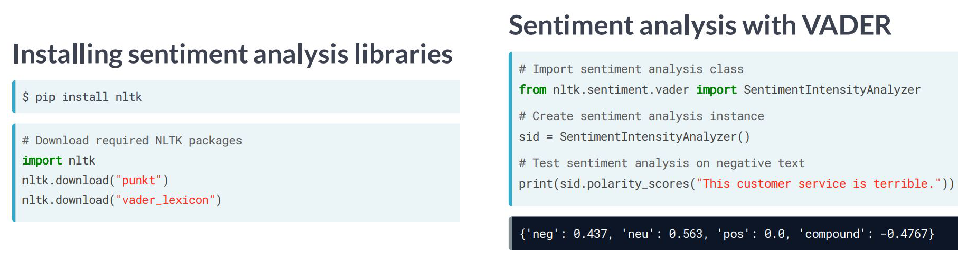

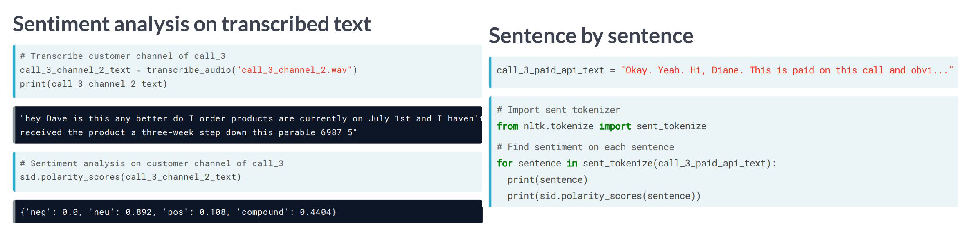

In [58]:
#vídeo
plot_2('n1', 'n2', wspace=0.1); plot_2('n3', 'n4'); 

Exercício 7

In [59]:
# Analyzing sentiment of a phone call

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Let's try it on one of our phone calls
call_2_text = transcribe_audio(data_folder +"call_2.wav")

# Display text and sentiment polarity scores
print(call_2_text)
print("\n")
print(sid.polarity_scores(call_2_text))

hello my name is Daniel thank you for calling Acme Studios how can I best help you from you guys and extremely happy with it I'll just go to East not an issue but I'm just going to learn a little bit more about the message prank I had but I thought you on the corner of Edward and Elizabeth according to Google according to the maps but some would you be able to help me in some way because I think I actually walked straight past your shop yeah sure thing well thank you Sally that's good to hear you're enjoying it let me let me find out where the nearest stories for you


{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.9858}


Exercício 8

In [60]:
# Sentiment analysis on formatted text

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Transcribe customer channel of call 2
call_2_channel_2_text = transcribe_audio(data_folder + "call_2_channel_2.wav")

# Display text and sentiment polarity scores
print(call_2_channel_2_text)
print("\n")
print(sid.polarity_scores(call_2_channel_2_text))

all hi Daniel my name is belly I've recently purchased a smartphone from you guys and extremely happy with it I'll just go to East Normandy Street but I'm just going to learn a little bit more about the message prank I have Google like Haitian but I'm finding it had I thought you on the corner of Edward and Elizabeth according to Google according to the maps but some would you be able to help me in some way because I think I actually walked straight past yourself


{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.8921}


In [61]:
# Import sent_tokenize from nltk
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Split call 2 channel 2 into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_text):
    print(sentence)
    print(sid.polarity_scores(sentence))
    print("\n")

all hi Daniel my name is belly I've recently purchased a smartphone from you guys and extremely happy with it I'll just go to East Normandy Street but I'm just going to learn a little bit more about the message prank I have Google like Haitian but I'm finding it had I thought you on the corner of Edward and Elizabeth according to Google according to the maps but some would you be able to help me in some way because I think I actually walked straight past yourself
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.8921}




In [62]:
%%script false

# Split channel 2 PAID text into sentences and score each
for sentence in sent_tokenize(call_2_channel_2_paid_api_text):
    print(sentence)
    print(sid.polarity_scores(sentence))

Couldn't find program: 'false'


#### Exercício 9 - Named Entity Recognition (NER) on transcribed text

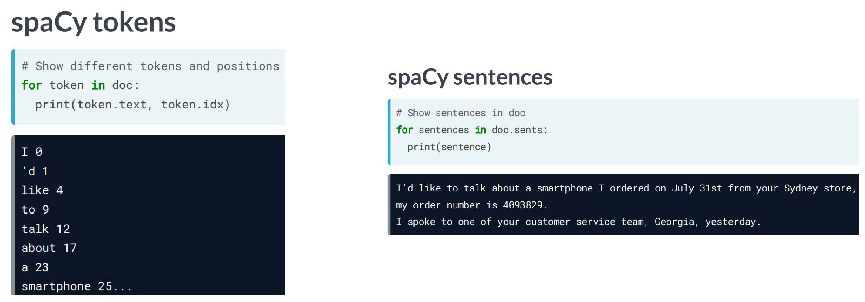

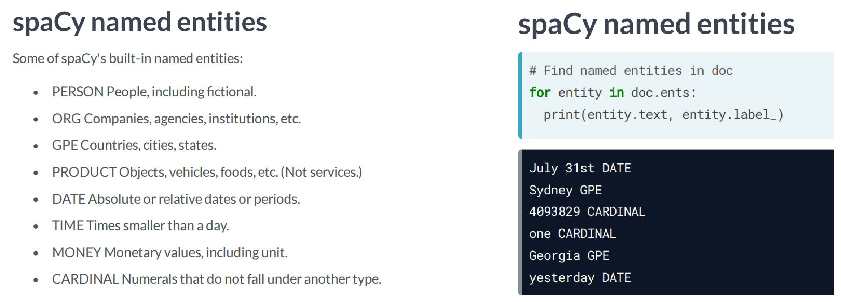


Custom named entities


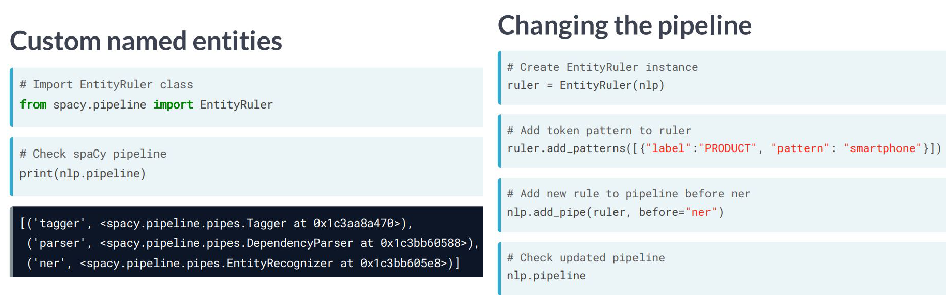

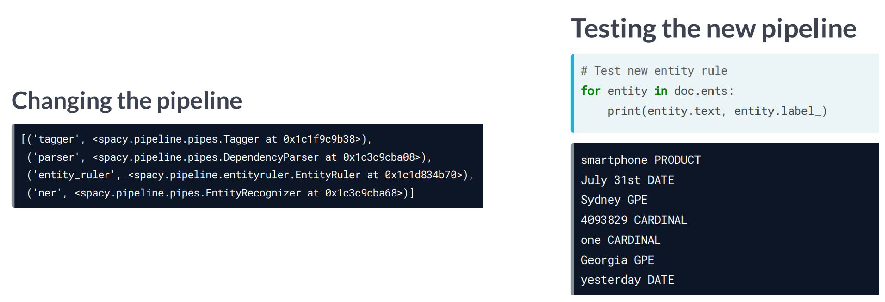

In [63]:
#vídeo

import spacy

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc
doc = nlp("""I'd like to talk about a smartphone I ordered on July 31st from your Sydney store, my order number is
            40939440. I spoke to Georgia about it last week.""")

plot_2('s2', 's3')
plot_2('s4', 's5'); print("="*120)
print("\nCustom named entities"); plot_2('s6', 's7'); plot_2('s8', 's9')

from spacy.pipeline import EntityRuler

Exercício 10

In [64]:
# Named entity recognition in spaCy

import spacy

# Transcribe call 4 channel 2
call_4_channel_2_text = transcribe_audio(data_folder + "call_4_channel_2.wav")

# Create a spaCy language model instance
nlp = spacy.load("en_core_web_sm")

# Create a spaCy doc with call 4 channel 2 text
doc = nlp(call_4_channel_2_text)

# Check the type of doc
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [65]:
# Show tokens in doc
for token in doc:
    print(token.text, token.idx)

Hawaii 0
Daniel 7
my 14
name 17
is 22
Anne 25
and 30
I 34
've 35
recently 39
just 48
purchased 53
a 63
smart 65
front 71
buying 77
from 84
you 89
and 93
I 97
'm 98
very 101
happy 106
with 112
the 117
product 121
I 129
'd 130
like 133
to 138
order 141
another 147
one 155
for 159
my 163
friend 166
believes 173
in 182
Sydney 185
and 192
have 196
it 201
delivered 204
I 214
'm 215
pretty 218
sure 225
it 230
's 232
model 235
315 241
like 245
an 250
check 253
that 259
for 264
you 268
and 272
I 276
'll 277
give 281
you 286
more 290
details 295
if 303
you 306
would 310
like 316
to 321
take 324
my 329
details 332
and 340
I 344
I 346
will 348
also 353
give 358
you 363
the 367
address 371
thank 379
you 385
excellent 389


In [66]:
# Show sentences in doc
for sentence in doc.sents:
    print(sentence)

Hawaii Daniel my name is Anne
and I've recently just purchased a smart front buying from you
and I'm very happy with the product I'd like to order another one for my friend believes in Sydney and
have it delivered I'm pretty sure it's model 315 like an check that for you and I'll give you more details if you would like to take my details
and I I will also give you the address
thank you excellent


In [67]:
# Show named entities and their labels
for entity in doc.ents:
    print(entity.text, entity.label_)

Hawaii Daniel ORG
Anne PERSON
Sydney GPE
315 CARDINAL


Exercício 11

In [68]:
# Creating a custom named entity in spaCy

# Import EntityRuler class
from spacy.pipeline import EntityRuler

# Create EntityRuler instance
ruler = EntityRuler(nlp)

# Define pattern for new entity
ruler.add_patterns([{"label": "PRODUCT", "pattern": "smartphone"}])

# Update existing pipeline
nlp.add_pipe(ruler, before="ner")

# Test new entity
for entity in doc.ents:
    print(entity.text, entity.label_)


Hawaii Daniel ORG
Anne PERSON
Sydney GPE
315 CARDINAL


#### Exercício 12 - Classifying transcribed speech with Sklearn

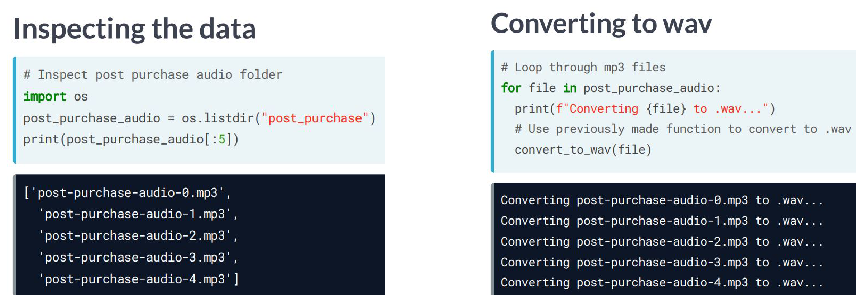

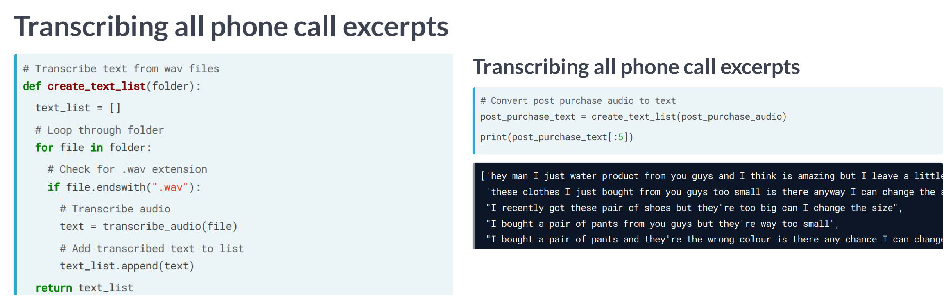

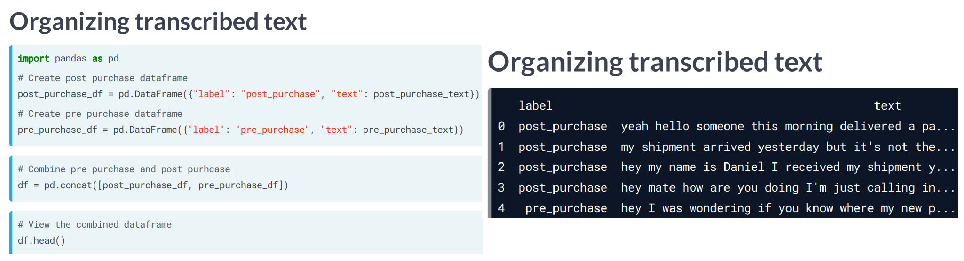

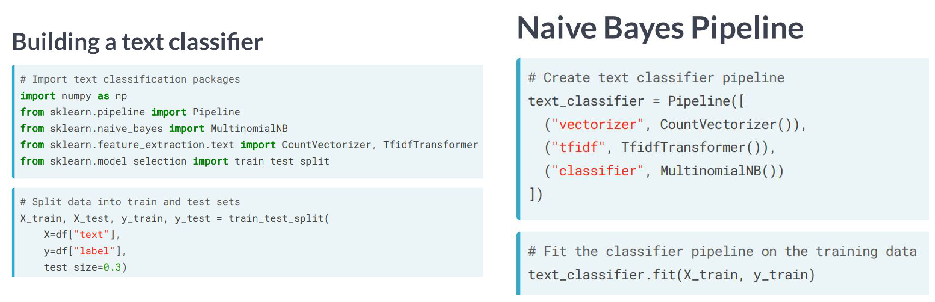

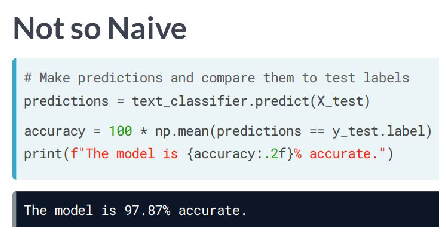

In [69]:
#vídeo
plot_2('i1', 'i2'); plot_2('i3', 'i4'); print("="*120)
plot_2('i5', 'i6'); print("="*120)
plot_2('i7', 'i8'); plot_1('i9')

Exercício 13

In [70]:
%%script false

# Preparing audio files for text classification

# One folder is called pre_purchase and contains audio snippets from customers who are pre-purchase, like
# pre_purchase_audio_25.mp3.

# And the other is called post_purchase and contains audio snippets from customers who have made a purchase (post-purchase),
# like post_purchase_audio_27.mp3.

def convert_to_wav(filename):
    new_filename = filename.split(".")[0] + ".wav"
    return new_filename
    
#########################################################################################

# Convert post purchase
for file in post_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)

# Convert pre purchase
for file in pre_purchase:
    print(f"Converting {file} to .wav...")
    convert_to_wav(file)
    

Couldn't find program: 'false'


Exercício 14

In [71]:
%%script false

# Transcribing phone call excerpts

def create_text_list(folder):
    # Create empty list
    text_list = []
  
    # Go through each file
    for file in folder:
        # Make sure the file is .wav
        if file.endswith(".wav"):
            print(f"Transcribing file: {file}...")
      
    # Transcribe audio and append text to list
    text_list.append(transcribe_audio(file))   
    return text_list

create_text_list(folder)

#########################################################################################

# Transcribe post and pre purchase text
post_purchase_text = create_text_list(post_purchase_wav_files)
pre_purchase_text = create_text_list(pre_purchase_wav_files)

# Inspect the first transcription of post purchase
print(post_purchase_text[0])

Couldn't find program: 'false'


In [72]:
# Transcribe post and pre purchase text
post_purchase_text = transcribe_audio(data_folder + "post-purchase-audio-27.wav")
pre_purchase_text = transcribe_audio(data_folder + "pre-purchase-audio-25.wav")

Exercício 15

In [73]:
# Organizing transcribed phone call data

import pandas as pd

# Make dataframes with the text
post_purchase_df = pd.DataFrame({"label": "post_purchase", "text": post_purchase_text}, index=[0])
pre_purchase_df = pd.DataFrame({"label": "pre_purchase", "text": pre_purchase_text}, index=[1])

# Combine DataFrames
df = pd.concat([post_purchase_df, pre_purchase_df])

# Print the combined DataFrame
df.head()

label                                               text
0  post_purchase  I'm pulling up to talk about a package I got y...
1   pre_purchase  yachad Jacob looking to make an order but just...

In [74]:
# vou adicionar só mais uns, é mais simples
df = df.append(pd.DataFrame([["pre_purchase", 
                              """how's it going Arthur I just placed an order with you guys and I accidentally 
                              sent it to the wrong address can you please help me change this"""], 
                             ["post_purchase",
                              """"yeah hello I'm just wondering if I can speak to someone about an order I received 
                              yesterday"""],
                            ["post_purchase",
                              """"hey I receive my order but it's the wrong size can I get a refund please"""],
                            ["pre_purchase",
                              """"hi David I just placed an order online and I was wondering if I could make an alteration
                              to that order before you send it off"""]], 
                            columns=["label", "text"]), ignore_index=True)

df

label                                               text
0  post_purchase  I'm pulling up to talk about a package I got y...
1   pre_purchase  yachad Jacob looking to make an order but just...
2   pre_purchase  how's it going Arthur I just placed an order w...
3  post_purchase  "yeah hello I'm just wondering if I can speak ...
4  post_purchase  "hey I receive my order but it's the wrong siz...
5   pre_purchase  "hi David I just placed an order online and I ...

Exercício 16

In [75]:
# Create a spoken language text classifier

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = df["text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)


In [76]:
# Build the text_classifier as an sklearn pipeline
text_classifier = Pipeline([('vectorizer', CountVectorizer()),
                            ('tfidf', TfidfTransformer()),
                            ('classifier', MultinomialNB()),])

# Fit the classifier pipeline on the training data
text_classifier.fit(X_train, y_train)

###########################################################################################################

# Evaluate the MultinomialNB model
predicted = text_classifier.predict(X_test)
accuracy = 100 * np.mean(predicted == y_test)

print(f'The model is {accuracy}% accurate')


The model is 50.0% accurate


#### Exercício 17 - end

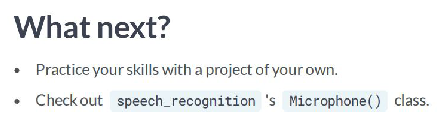

In [77]:
#vídeo
plot_1('w11')

# Fim